![rest](restaurant_london.jpeg)

### Overview

The goal of this project is to analyze the customers' sentiments based on Yelp restaurant reviews.<br>
This type of analysis is known as a part of NLP tasks and highly used for business purposes, such as online marketing automation, measurement of product's users exeperience and etc.<br>
In this particular task we will follow the steps below to complete end-to-end machine learning project:<br>

1. Import necessary libraries;
2. Data gathering and cleansing;
3. Explanatory analysis;
4. Models building and result comparison;
5. Making prediction.

The closing section sums up the project results and aprovides the further improvement recommendations. 

**Data and tools used:**

- Data source: https://www.yelp.com/ (web-scrapping);<br>
- Ipython kernel: Python 2.7;<br>
- Models: Logistic regression, Adaptive Boosing Classifier.

### Libraries import

In [17]:
# "wordcloud" installation with sys - visualize a cloud of unique words occured 
import sys

!{sys.executable} -m pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/ea/b8/e0b3315020bdbb7b4cb6f429340f1f0576f7bbfe24be3c96608932a7d609/wordcloud-1.5.0-cp27-cp27m-win_amd64.whl


In [25]:
# import learning curve for model performance visualization 
!{sys.executable} -m pip install learning_curve

  Could not find a version that satisfies the requirement learning_curve (from versions: )
No matching distribution found for learning_curve


In [394]:
!{sys.executable} -m pip install scikit-plot

  Using cached https://files.pythonhosted.org/packages/0d/1b/995167f6c66848d4eb7eabc386aebe07a1571b397629b2eac3b7bebdc343/joblib-0.13.0-py2.py3-none-any.whl
  Running setup.py bdist_wheel for scikit-plot: started
  Running setup.py bdist_wheel for scikit-plot: finished with status 'done'
  Stored in directory: C:\Users\Refresh\AppData\Local\pip\Cache\wheels\a7\ac\fe\750d7565f5d867f9fd82b2408a76a6170d21ef0628d30502ec
Successfully built scikit-plot


In [1]:
"""
- importing urllib2, BeautifulSoup and requests for yelp web-scrapping 
- pandas, matplotlib, numpy - for data manipulation 

"""
import urllib2 
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
"""
- libraries for working with text and visualizing output

"""
from collections import Counter
import nltk
from wordcloud import WordCloud
from nltk import FreqDist # get word count
from nltk.tokenize import word_tokenize # tokenize the sentences by word

In [3]:
"""
- model building and measure performance
- parametres are estimated with grid search 

"""
from sklearn import metrics
from sklearn.utils import shuffle # shuffle data before learning curve plotting
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import scikitplot as skplt

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### Data preparation 

The restaurants listed on Yelp wibsite and used for reviews collecting. 

In [289]:
restaurants = [
'https://www.yelp.com/biz/hide-london?start=', 
'https://www.yelp.com/biz/a-wong-london?start=', 
'https://www.yelp.com/biz/restaurant-gordon-ramsay-london-3?start=', 
'https://www.yelp.com/biz/dinner-by-heston-blumenthal-london?start=', 
'https://www.yelp.com/biz/the-breakfast-club-london-3?start=', 
'https://www.yelp.com/biz/five-guys-london-23?start=', 
'https://www.yelp.com/biz/kowloon-london?osq=Kowloon+Restaurant?start=', 
'https://www.yelp.com/biz/cubana-london?start=', 
'https://www.yelp.com/biz/pizza-east-london?start=', 
'https://www.yelp.com/biz/las-iguanas-london?start=', 
'https://www.yelp.com/biz/mother-mash-london?start=', 
'https://www.yelp.com/biz/shake-shack-covent-garden-london-4?start=', 
'https://www.yelp.com/biz/meat-liquor-london?start=', 
'https://www.yelp.com/biz/lupita-london-9?start=',
'https://www.yelp.com/biz/jamies-italian-covent-garden-london?start=']

Here we will create the empty lists for reviews and corresponding ratings. <br>
With each link from restaurants list opened we will iterate through the range of pages and scrap reviews  data. 

In [290]:
review_list=[]
rating_list=[]
pages=range(0,260,20)

# create a list of all pages for each restaurat
all_pages=[] 

for url in restaurants:
    for page in pages:
        rest_page = url+str(page)  
        all_pages.append(rest_page) # append the next page to list

In [ ]:
"""
- open each link with urllib2
- read the content with Beautiful soup 
- find corresponding review text and rating under 'div' calss on html page 

"""

for link in all_pages:
    content = urllib2.urlopen(link) 
    soup = BeautifulSoup(content, 'html.parser')
    
    for review in soup.findAll('div',{"class":"review-content"}):
        rating_list.append(review.div.div.div.get("title"))
        review_list.append(review.find('p').text)

In [ ]:
# initialize Dataframe and add columns with text and rating both
reviews = pd.DataFrame()
reviews['rating'] = rating_list
reviews['rating'] = reviews['rating'].str[:3]
reviews['reviews'] = review_list

In [ ]:
"""
- remove punctuation from sentences
- lead all words to a lower case 
- convert rating to float and write into csv  to save results

"""
reviews['reviews_punctuation_free'] = reviews['reviews'].str.replace('[^\w\s]',' ') # used space, since some words can be merged
reviews['reviews_punctuation_free'] = reviews['reviews_punctuation_free'].str.lower()

reviews['rating'] = reviews['rating'].astype('float64')
reviews.to_csv('sent_reviews.csv', sep='\t', encoding='utf-8')

#### Reading from CSV

In [29]:
reviews = pd.read_csv('sent_reviews.csv', sep='\t', quoting=csv.QUOTE_NONE)

reviews.drop('Unnamed: 0', axis=1, inplace=True)

#### Assign sentiment classes 

For each review in frame we assign the sentiment class in order to split the reviews on positive or negative and create a target label.

- rating = 4.0 and 5.0 --> ***class = 1***
- rating < 2.0 --> ***class = 0***
- rating = 3.0 --> *do not include, neutral assessment*

In [30]:
reviews = reviews[reviews['rating'] != 3.0]
reviews['sentiment'] = reviews['rating'].apply(lambda rating : +1 if rating >= 4.0 else 0)

In [31]:
reviews.tail(10)

,rating,reviews,reviews_punctuation_free,sentiment
2443,2.0,I have been to this restaurant twice. The fir...,i have been to this restaurant twice the fir...,0
2444,4.0,I was quite excited about going to this restau...,i was quite excited about going to this restau...,1
2445,5.0,I wanted so much to go to Jamie's restaurant a...,i wanted so much to go to jamie s restaurant a...,1
2446,4.0,"Was a bit touristy, due to Jamie's new fame. ...",was a bit touristy due to jamie s new fame ...,1
2447,5.0,Could not fault this place. We went back the n...,could not fault this place we went back the n...,1
2448,5.0,Superb food but extremely crowded! Friendly st...,superb food but extremely crowded friendly st...,1
2449,4.0,"When my local friend suggested dinner here, I ...",when my local friend suggested dinner here i ...,1
2451,2.0,Well I was very disappointed with my whole exp...,well i was very disappointed with my whole exp...,0
2452,5.0,Our favorite restaurant on our most recent vis...,our favorite restaurant on our most recent vis...,1
2453,5.0,I have a new found respect for Jamie Oliver af...,i have a new found respect for jamie oliver af...,1


### Explanatory  analysis

#### Imbalance classes

Starting with investigating balance classes we can plot the number of reviews assigned to each class.

Text(0.5,1,'Sentiment classes')

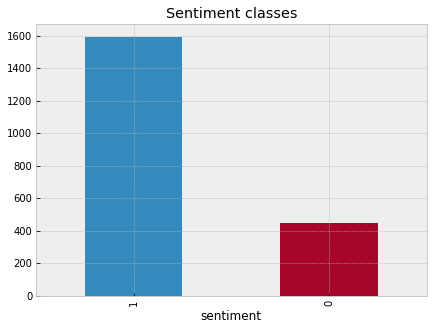

In [32]:
plt.style.use('bmh') # set up matplotlib style 

fig, ax = plt.subplots(figsize=(7,5))
reviews['sentiment'].value_counts().plot.bar() 
ax.set_xlabel('sentiment')
ax.set_title('Sentiment classes')

In [33]:
# display the number of each class in percentage
(reviews['sentiment'].value_counts(normalize=True)*100).round(2)

1    78.07
0    21.93
Name: sentiment, dtype: float64

Bar chart above highlight significant imbalance classes with positive major class. <br>
One of the propriate ways to mitigate imbalance is to make the equal proportion for both classes. However, the obvious disadvantage of this approach leads to entire sample reduction.

In [174]:
"""
- split frame into parts based on positive/negarite sentiment
- undersample the major class to keep equal size for both
- create dataframe with balanced classes

"""
positive_frame = reviews[reviews['sentiment']==1]
negative_frame = reviews[reviews['sentiment']==0]

# estimate the size ratio
percentage = len(negative_frame)/float(len(positive_frame))
negative = negative_frame
positive = positive_frame.sample(frac=percentage) # use the same percentage
# append negative reviews sample to reduced positive frame 
reviews_data = negative.append(positive)

In [175]:
print "Positive class ratio:", len(positive) / float(len(reviews_data))
print "Negative class ratio:", len(negative) / float(len(reviews_data))
print "Entire frame length:", len(reviews_data)

Positive class ratio: 0.5
Negative class ratio: 0.5
Entire frame length: 894


#### Words count and visualization 

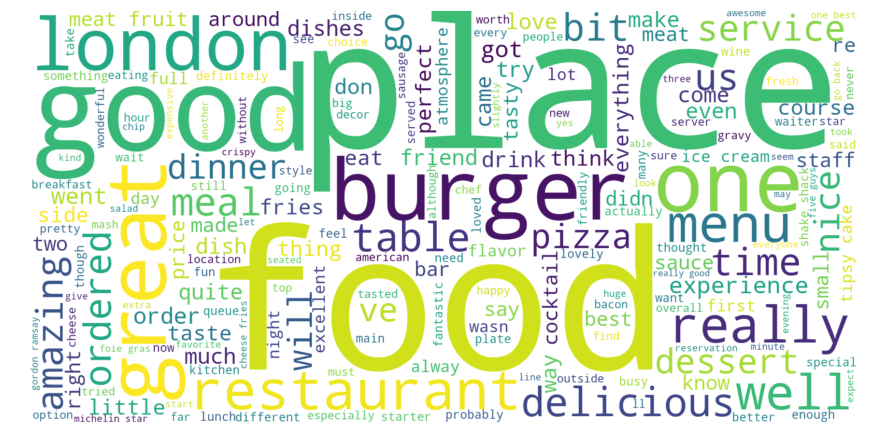

<Figure size 432x288 with 0 Axes>

In [123]:
"""
- for each review perform transformation into string type
- generate the cloud of words using Wordcloud() module 

"""

text_pos=str() # initialize strig for positive  frame
for rev in positive_frame['reviews_punctuation_free']:
    rev=str(rev)
    text_pos = text_pos+rev
    
# create wordcloud object with text_pos as an argument 
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(text_pos)
# plot as a figure
plt.figure(figsize=(12,8))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig('positive.png', bbox_inches='tight')

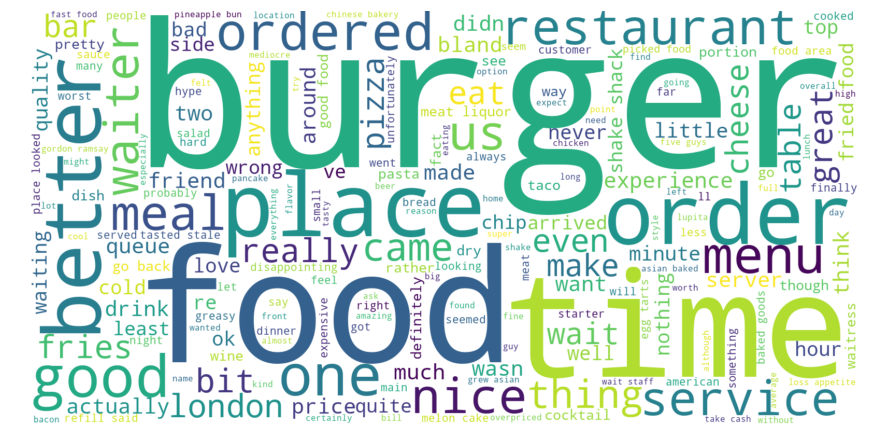

<Figure size 432x288 with 0 Axes>

In [124]:
"""
- complete the same procedure for negative reviews

"""
text_neg=str()
for word in negative_frame['reviews_punctuation_free']:
    word=str(word)
    text_neg = text_neg+word

wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(text_neg)

plt.figure(figsize=(12,8))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

plt.savefig('negative.png', bbox_inches='tight')

As we can conclude from charts the most common words display neutral customers sentiments and gereral term (such as 'food', 'place', 'london' or 'order', 'pizza') rather than feelings or particular experience. <br>
Let's tokenize the words and sort them with respect of frequency.

In [125]:
"""
- create a token object as a list of words, count the occurence respectively using FreqDist() module
- display the frequency for number of words (250 in example)

"""

nltk.download('punkt')

from nltk import FreqDist # used later to plot and get count
from nltk.tokenize import word_tokenize # tokenizes our sentence by word

token = word_tokenize(text_pos)

fdist = FreqDist(token)

fdist.most_common(250)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Refresh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('the', 12530),
 ('and', 7823),
 ('a', 6438),
 ('i', 5877),
 ('to', 4624),
 ('was', 4117),
 ('of', 4014),
 ('it', 3675),
 ('in', 2903),
 ('is', 2552),
 ('for', 2512),
 ('with', 2324),
 ('you', 2100),
 ('but', 2009),
 ('we', 1983),
 ('that', 1807),
 ('my', 1588),
 ('this', 1575),
 ('on', 1456),
 ('had', 1420),
 ('t', 1351),
 ('as', 1340),
 ('were', 1324),
 ('so', 1318),
 ('s', 1315),
 ('food', 1250),
 ('not', 1134),
 ('have', 1116),
 ('good', 1087),
 ('at', 1078),
 ('they', 1036),
 ('are', 917),
 ('be', 875),
 ('very', 856),
 ('all', 846),
 ('there', 785),
 ('place', 772),
 ('great', 768),
 ('one', 744),
 ('which', 714),
 ('like', 686),
 ('service', 672),
 ('if', 669),
 ('just', 654),
 ('here', 642),
 ('london', 642),
 ('really', 623),
 ('go', 604),
 ('from', 602),
 ('our', 599),
 ('restaurant', 579),
 ('can', 577),
 ('out', 575),
 ('would', 546),
 ('menu', 543),
 ('me', 533),
 ('your', 529),
 ('an', 527),
 ('burger', 521),
 ('also', 512),
 ('more', 498),
 ('delicious', 494),
 ('up', 4

In [126]:
"""
- display frequency for negative cases

"""
token = word_tokenize(text_neg)

fdist = FreqDist(token)

fdist.most_common(250)

[('the', 3745),
 ('and', 2194),
 ('to', 2019),
 ('a', 1827),
 ('i', 1751),
 ('was', 1358),
 ('it', 1118),
 ('of', 1050),
 ('we', 892),
 ('in', 840),
 ('for', 793),
 ('that', 691),
 ('t', 675),
 ('but', 642),
 ('you', 596),
 ('food', 591),
 ('were', 574),
 ('is', 560),
 ('with', 545),
 ('my', 508),
 ('at', 507),
 ('this', 486),
 ('on', 480),
 ('not', 469),
 ('had', 456),
 ('they', 450),
 ('s', 381),
 ('have', 377),
 ('be', 347),
 ('so', 342),
 ('if', 292),
 ('like', 290),
 ('as', 289),
 ('our', 281),
 ('place', 273),
 ('there', 272),
 ('good', 272),
 ('just', 268),
 ('no', 260),
 ('us', 254),
 ('service', 244),
 ('when', 243),
 ('one', 238),
 ('are', 228),
 ('very', 227),
 ('all', 221),
 ('me', 218),
 ('restaurant', 214),
 ('get', 212),
 ('really', 208),
 ('out', 207),
 ('burger', 203),
 ('up', 190),
 ('table', 190),
 ('only', 187),
 ('from', 183),
 ('would', 182),
 ('which', 182),
 ('don', 174),
 ('because', 173),
 ('about', 170),
 ('an', 169),
 ('after', 167),
 ('by', 166),
 ('your', 

### Model selection

Since the majority of words for both positive and negative samples represent neutral sentiment, the reasonable solution seemed to prepare the bunch of sensitive words as features to build the separating hyperplane and hit the better model performance.

#### Keywords selection

Collection of features represents both positive and negative customer's restaurant experience.

In [176]:
keywords = ['wonderful', 'loved', 'love', 'lovely', 'perfectly', 'perfect', 'disappointed', 'terrible', 'nasty',
            'recommend', 'delicious', 'served', 'dirty', 'amazing', 'excellent', 'good', 'friendly','tasty', 
            'fantastic','happy', 'never', 'gross', 'decent', 'service', 'like', 'bad', 'rudeness', 'enjoy', 'enjoyed',
            'filling','poor', 'refill','awful', 'hungry', 'hate', 'hated']

Next we will estimate the count for the number of times the keyword occurs in the review. As a result of feature processing a single column for each word will be created.

In [177]:
# create a binary column for each word in 'reviews_punctuation_free' column
for i in keywords:
    reviews_data[i] = reviews_data['reviews_punctuation_free'].apply(lambda x : x.split().count(i))

In [178]:
reviews_data.head()

,rating,reviews,reviews_punctuation_free,sentiment,wonderful,loved,love,lovely,perfectly,perfect,...,rudeness,enjoy,enjoyed,filling,poor,refill,awful,hungry,hate,hated
12,1.0,They denied us because we didn't have a reserv...,they denied us because we didn t have a reserv...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,1.0,"Boy, I wish I could put zero stars..for 3 days...",boy i wish i could put zero stars for 3 days...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1.0,I have never seen a Chinese restaurant to do b...,i have never seen a chinese restaurant to do b...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,2.0,Terrible reception to an empty restaurant with...,terrible reception to an empty restaurant with...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2.0,"""If you are not hungry and enjoy huge pots for...",if you are not hungry and enjoy huge pots for ...,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,0


#### Train-test split

First, we make a split with 10% of test data. We will use this to make predictions later. <br>
Then, split rest of the data into a train-validation with 80% of training set and 20% of the data for the validation set.

In [179]:
"""
- split train_val and test data 
- split train and validation 
- create variables for features and label data

"""

train_val_data, test_data = train_test_split(reviews_data, test_size=0.1)
train_data, validation_data = train_test_split(train_val_data, test_size=0.2)

# display train, validation proportion
print 'Training sample   : %d' % len(train_data)
print 'Validation sample : %d' % len(validation_data)

feature_train = train_data[keywords]
sentiment_train = train_data['sentiment']
                                            
feature_val = validation_data[keywords]
sentiment_val = validation_data['sentiment']

Training sample   : 643
Validation sample : 161


#### Training simple model (regularization not included)

We start model building with simple logistic regression - we will fit model on train dataset and measure accuracy on validation. 

In [180]:
"""
- since l2 is default penalty, we can take c as high value C=1e4
- C approaches 0 and cost function becomes standard error function

"""

simple_model = LogisticRegression(penalty = 'l2', C=1e4, random_state = 1)
simple_model.fit(feature_train, sentiment_train)
sentiment_pred = simple_model.predict(feature_val)
simple_score = accuracy_score(sentiment_val, sentiment_pred)

print 'Simple model accuracy validation: ' + str(round(simple_score, 3))

Simple model accuracy validation: 0.783


#### L2 regularization effects

Then let's fit the model with different L2 regalarization parameters.<br>
First, we are going to list the values of $λ = 1/c$ and fit the model with parametres $c$ - the inverse of regularization strength. Small value of c leads to strong regularization. 

In [181]:
c_param = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1] # range of c = 1/lambda coefficients
score_list = []

for c in c_param:
    model = LogisticRegression(penalty = 'l2', C = c,random_state = 1)
    model.fit(feature_train, sentiment_train)
    sentiment_pred = model.predict(feature_val)
    score = accuracy_score(sentiment_val, sentiment_pred)
    score_list.append(score) 

In [182]:
"""
- represent the results of different regularization strength as dataframe 

"""
scores = pd.DataFrame({'C-parameter': c_param, 'Accuracy score': score_list})

scores

,Accuracy score,C-parameter
0,0.695652,0.0001
1,0.701863,0.0010
2,0.720497,0.0050
3,0.782609,0.0100
4,0.782609,0.0500
5,0.776398,0.1000
6,0.795031,1.0000


#### Best-model coefficients

Next we going to show fit logistic regression model with best regularization parameter to shortlist the coefficient values. <br>
Recall the large coefficients values attest potential overfitting of model. 

In [183]:
"""
- fit model with c = 0.05 as best performed on validation set
- create dataframe with coefficients of fitted model 

"""

reg_model = LogisticRegression(penalty = 'l2', C = 0.05, random_state = 1)
reg_model.fit(feature_train, sentiment_train)
# concat the features list (keywords) and corresponding values 
coefficients = pd.concat([pd.DataFrame(feature_train.columns),
                        pd.DataFrame(np.transpose(reg_model.coef_))],
                        axis = 1)
coefficients.columns = ['Feature', 'coefficients']
coefficients = coefficients.append({'Feature':'Intercept',
                                   'coefficients':reg_model.intercept_[0]},
                                  ignore_index=True)

In [184]:
coefficients.sort_values('coefficients', ascending=False)

,Feature,coefficients
10,delicious,0.753607
13,amazing,0.618723
1,loved,0.515113
5,perfect,0.480637
14,excellent,0.415803
17,tasty,0.362062
4,perfectly,0.352833
2,love,0.305544
9,recommend,0.303009
19,happy,0.301588


#### Evaluating accuracy on test data

In [185]:
"""
- use .predict() method to make predictions 
- calculate the accuracy score on test 

"""
simple_pred = simple_model.predict(test_data[keywords])
simple_score = accuracy_score(test_data['sentiment'], simple_pred)

print 'Simple model accuray: ' + str(round(simple_score, 3))

Simple model accuray: 0.822


In [186]:
"""
- use the same method to calculate score for regularized model

"""
reg_pred = reg_model.predict(test_data[keywords])
reg_score = accuracy_score(test_data['sentiment'], reg_pred)

print 'Regularized model accuray: ' + str(round(reg_score, 3))

Regularized model accuray: 0.833


#### Adaptive Boosting Classifier

To improve the performance of classification model we able to apply ensemble algorithm as a combinataion of weaker classification algorithms for each iteration $t = 1...T$ .<br>
The common choice would be Adaptive Boosting algorithm evaluation. We will fit a model testing different parametres via search grid to approach the optimum.

In [187]:
"""
- first, we test the range of trees for descision classifier and learning rate
- establish a minimal number for internal node split = 5

"""
n_trees = range(10, 50, 5) 
learning_rate = [0.0001, 0.001, 0.01, 0.1]
dtree = DecisionTreeClassifier(random_state = 1, min_samples_split=5) # create decision tree classifier object
adboost = AdaBoostClassifier(base_estimator=dtree)

In [188]:
"""
- additionally we will use two metrics for spliting a tree - gini and entropy criteria 
- specify 3 folds cross-validation as a gridsearch parameter 

"""

param = {'base_estimator__criterion' : ['gini', 'entropy'],
         'learning_rate': learning_rate,
          "n_estimators": n_trees}

grid_cv = GridSearchCV(adboost, param_grid=param, scoring = 'accuracy', cv=3)

grid_cv.fit(feature_train, sentiment_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45], 'base_estimator__criterion': ['gini', 'entropy'], 'learning_rate': [0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [189]:
"""
- show the best model score on validation and related parametres 

"""
print round(grid_cv.best_score_,4)
print grid_cv.best_params_

0.7558
{'n_estimators': 45, 'base_estimator__criterion': 'entropy', 'learning_rate': 0.001}


Calculate predictions for AdaBoost and show accuracy on test data. 

In [190]:
best_adboost = grid_cv.best_estimator_
predictions = best_adboost.predict(test_data[keywords])
round(metrics.accuracy_score(test_data['sentiment'], predictions),4)

0.7667

#### Learning curve

In order to illustrate the accuracy score change with respect to train-validation sample size, we will plot the learning curves for trained models. 

In [191]:
"""
- return values from dataframe, suffle features and label 
- define a function to evaluate learning curve on train size range 
- print mean score on each train sample and plot curves for train and validation 

"""

X=reviews_data[keywords].values
y=reviews_data['sentiment'].values
X_shuf, y_shuf = shuffle(X, y)

def plot_learning_curve(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X_shuf, y_shuf, train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')
    print 'Training sample size: ' + str(train_sizes)
    print 'Mean score for train samples: ' + str(train_scores.mean(axis = 1))
    print 'Mean score for test samples: ' + str(test_scores.mean(axis = 1))
    
    plt.figure(figsize=(9,7))
    plt.plot(train_sizes, train_scores.mean(axis = 1), 'b-', marker='o', label='train')
    plt.plot(train_sizes, test_scores.mean(axis = 1), '--', color='#af2c18', marker='o', label='validation')
    plt.ylim((0.0, 1.05))
    plt.legend(loc='upper right')
    plt.xlabel("training size", size=12)
    plt.ylabel("accuracy score", size=12)


Training sample size: [ 59 178 298 417 536]
Mean score for train samples: [0.97175141 0.85580524 0.82997763 0.82014388 0.81156716]
Mean score for test samples: [0.68120805 0.75167785 0.76510067 0.76733781 0.79194631]


Text(0.5,1,'Logistic regression - unregularized')

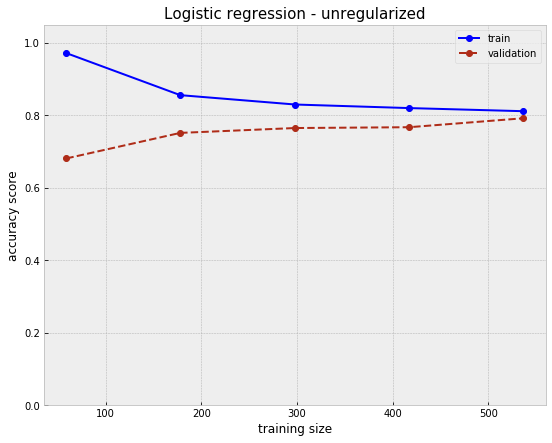

In [192]:
plot_learning_curve(simple_model)
plt.title('Logistic regression - unregularized', size=15)

The accuracy on train sample goes down along with train sample increasing. <br>
On the other hand, validation score grows starting from 50 observations and gets flat reached sample size equals 250. However gap between train and validation doesn't seem significant. 

Training sample size: [ 59 178 298 417 536]
Mean score for train samples: [0.80225989 0.79213483 0.80425056 0.79776179 0.79850746]
Mean score for test samples: [0.67225951 0.72930649 0.75615213 0.76957494 0.78411633]


Text(0.5,1,'Logistic regression - L2 regularized')

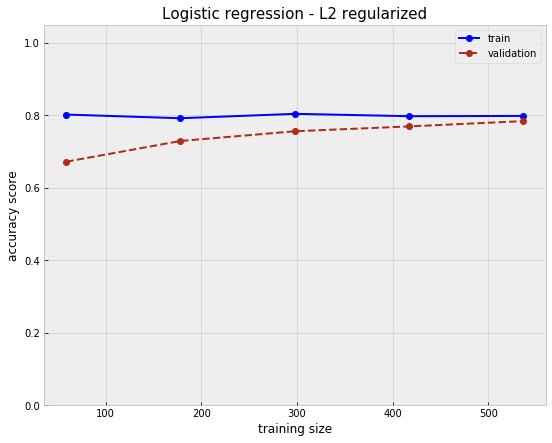

In [193]:
plot_learning_curve(reg_model)
plt.title('Logistic regression - L2 regularized', size=15)

From learning curve above we see the regularization parameter for logistic regression slightly underfits the data compared to a simple regularization free model. The gap between train and validation remains small. 

Training sample size: [ 59 178 298 417 536]
Mean score for train samples: [0.98305085 0.91947566 0.92393736 0.91686651 0.91044776]
Mean score for test samples: [0.67337808 0.7147651  0.7393736  0.73378076 0.75391499]


Text(0.5,1,'Adaptive Boosting model')

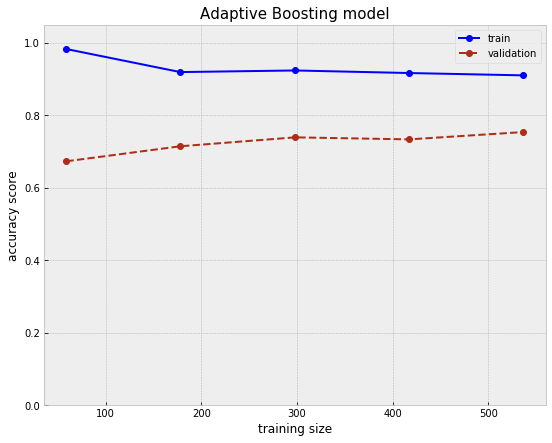

In [194]:
plot_learning_curve(best_adboost)
plt.title('Adaptive Boosting model', size=15)

Despite the fact Adaboost models are not prone to overfitting, they tend to be sensitive to noisy data.
The gap between train and validation seems more considerable, but keeps decreasing slightly with larger train sample. 

#### Evaluating results on ROC curve

Finally, validate the results of models plotting ROC curve for each to illustrate graphically sensitivity and specificity for pairs with respect to decision threshold.

In [195]:
"""
- return the probabilities for binary classification  
- plot receiver operating curve

"""

def roc_curve(model):
    
    plt.figure(figsize=(9,7))
    y_probs = model.predict_proba(test_data[keywords])
    skplt.metrics.plot_roc(test_data['sentiment'], y_probs, 
                           figsize=(9,7), title=None, cmap='Blues')
    

Text(0.5,1,'ROC for unregularized model')

<Figure size 648x504 with 0 Axes>

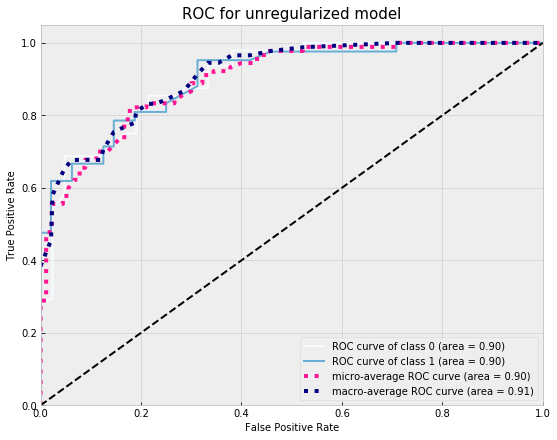

In [196]:
# plot ROC for simple regularization free model
roc_curve(simple_model)
plt.title('ROC for unregularized model', size=15)

Text(0.5,1,'ROC for L2 regularized model')

<Figure size 648x504 with 0 Axes>

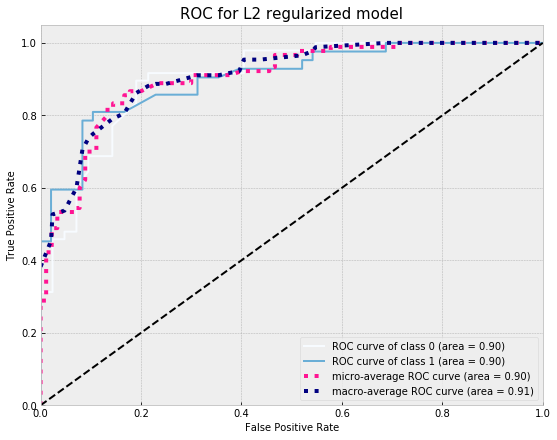

In [197]:
# plot ROC for L2 regularized model
roc_curve(reg_model)
plt.title('ROC for L2 regularized model', size=15)

Text(0.5,1,'ROC for Adaptive Boost model')

<Figure size 648x504 with 0 Axes>

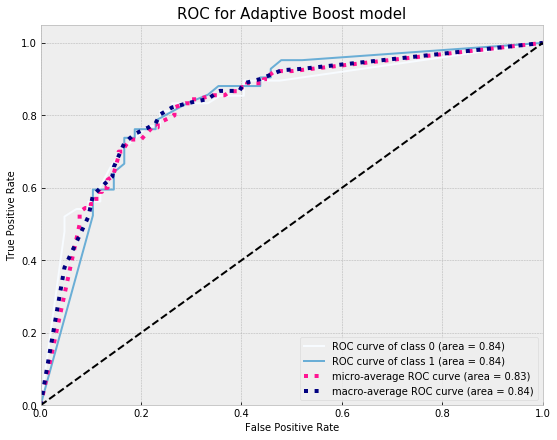

In [198]:
# plot ROC for AdaBoost
roc_curve(best_adboost)
plt.title('ROC for Adaptive Boost model', size=15)

The charts above presents the highest overall accuracy and sensitivity/specificity tradeoff on test for regularized logistic model with parameter C=0.05. However, in our case simple and regularized model perform in similar way. The less accurate performance was shown by AdaBoost model, that could be explained by the fact of sensitivity to noisy data .  

### Best model predictions

Form the best model predictions as a dataframe and compare them with test labels. 

In [463]:
"""
- create a dataframe object
- combine predictions with target on test, write to csv 

"""
pred = pd.DataFrame()
target=list(test_data['sentiment'])
pred['prediction']=reg_pred
pred['target']=target

pred.to_csv('pred-target.csv', sep='\t', encoding='utf-8')
pred.head(10)

,prediction,target
0,0,0
1,0,0
2,1,0
3,1,1
4,1,1
5,1,1
6,1,0
7,0,1
8,0,0
9,1,1


### Further improvements

The next steps for reaching higher modeling performance can be taken in following directions:

1. Lexical normalization:
 - Characters repetition, elonged words handling;
 - Reviews translation - train additional machine learning model to translate the sentences; <br>
2. Features engineering:
 - Focus on words relationship, paired words influence;
 - POS tagging use to identify the emotional tokens of content words;
3. Use of lexicon-based algorithms, more orientated on semantic analysis and syntactic relationships. 